<img src="RT.jpg" alt="drawing" width="300"/>

# Rotten Tomatoes top 100 movies

**link:** https://www.rottentomatoes.com/top/bestofrt/

**Rotten Tomatoes** is an American review-aggregation website for film and television. The company was launched in August 1998 by three undergraduate students at the University of California, Berkeley: Senh Duong, Patrick Y. Lee, and Stephen Wang. Although the name "Rotten Tomatoes" connects to the practice of audiences throwing rotten tomatoes when disapproving of a poor stage performance, the original inspiration comes from a scene featuring tomatoes in the Canadian film Léolo (1992).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('RottenTomatoesTop100.csv', index_col='Rank')

In [3]:
df.head()

,Movie title,Release year,No of reviews,Director,Movie link,Tomatometer,Audience ratings,Run time(Minutes)
Rank,,,,,,,,
1,Black Panther,2018,499,Ryan Coogler,https://www.rottentomatoes.com/m/black_panther...,97%,79%,135
2,Avengers: Endgame,2019,509,Anthony Russo,https://www.rottentomatoes.com/m/avengers_endgame,94%,90%,182
3,Us,2019,515,Jordan Peele,https://www.rottentomatoes.com/m/us_2019,93%,59%,120
4,Toy Story 4,2019,429,Josh Cooley,https://www.rottentomatoes.com/m/toy_story_4,97%,94%,90
5,The Wizard of Oz,1939,117,"King Vidor, Victor Fleming",https://www.rottentomatoes.com/m/the_wizard_of...,98%,89%,101


In [4]:
df['Release year'] = df['Release year'].astype('int64')
df['Tomatometer'] = df['Tomatometer'].apply(lambda t: t.strip('%')).astype('int64')
df['Audience ratings'] = df['Audience ratings'].apply(lambda t: t.strip('%')).astype('int64')

## Rating System

Rotten tomatoes has 2 rating measures, one is the tomatometer, which is an aggregate of ratings given by its selected Critics and the other rating is the rating given by the audience. The Rotten tomatoes site has given a guidline how could someone become their approved Critic - 
    
    "Tomatometer-approved critics come from all across the U.S., and the world. They publish on a variety of platforms – among them you’ll find podcasters, newspaper and magazine writers, bloggers, and YouTubers. Reviews from Tomatometer-approved critics form the trusted Tomatometer® score for movies and TV shows. Their reviews embody several key values – insight and dedication among them – and meet a set of Eligibility Guidelines."
   
The link to the **main eligibility criteria is**: https://www.rottentomatoes.com/help_desk/critics

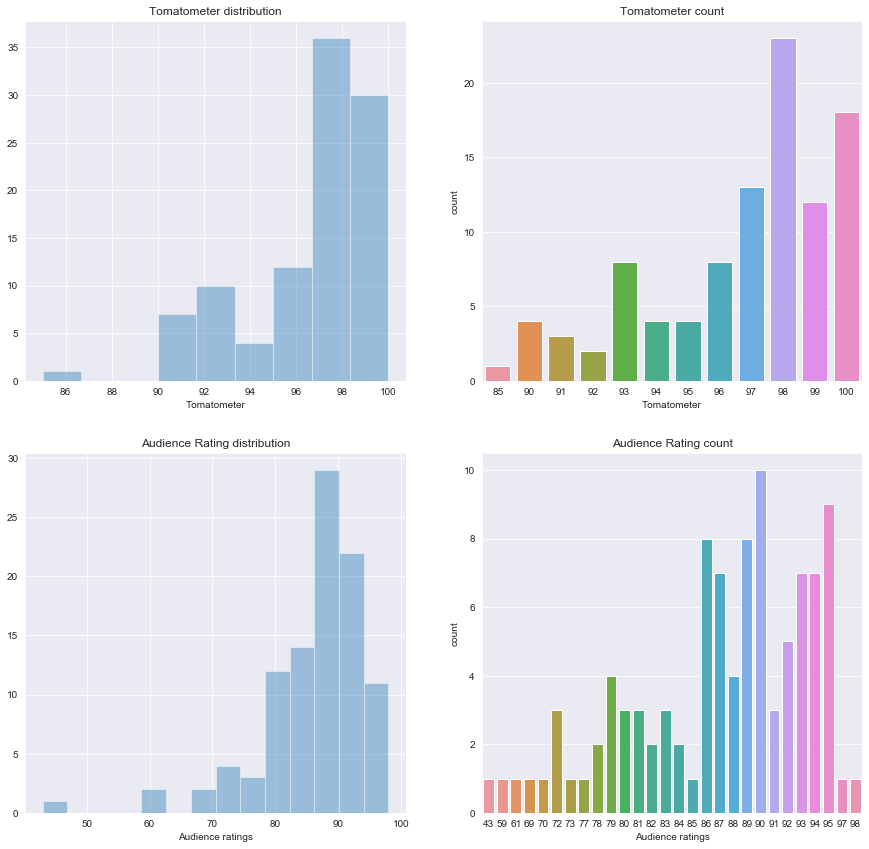

In [5]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

plt.subplots_adjust(top=1.5)

axs[0][0].title.set_text('Tomatometer distribution')
axs[0][1].title.set_text('Tomatometer count')
sns.distplot(df['Tomatometer'], kde=False, ax=axs[0][0])
sns.countplot(df['Tomatometer'], ax=axs[0][1])

axs[1][0].title.set_text('Audience Rating distribution')
axs[1][1].title.set_text('Audience Rating count')
sns.distplot(df['Audience ratings'], kde=False, ax=axs[1][0])
sns.countplot(df['Audience ratings'], ax=axs[1][1])

### Results:

The analysis showed that most of the critcs rating lied between 86% to 100%, but on the other hand the audience had a wider rating system which lied between 50% to 90%. The parallel count plots show this variation, in the critics ratings, about 20 movies got a rating of 97% and about 16-17 movies got a rating of 100%. When the audience rating is looked upon similarly, the results are quite differing. There's no movie with a 100% rating and about 8-10 movies have got a rating of 90% and 95%. 

## Year distribution:

The movies in this list range from 1920 to 2019. Those are almost 100 years, but the movies don't range that much. Most movies that are on this list, are mostly found in the years 2015 to 2019. Most years before these years have a mere count of 1, 2 or 3. There could be many movies that wouldn't have made to this list but are considered to be gems from the past. The reason for this is that most movies that are most accessible to the audience are of the last decade.  

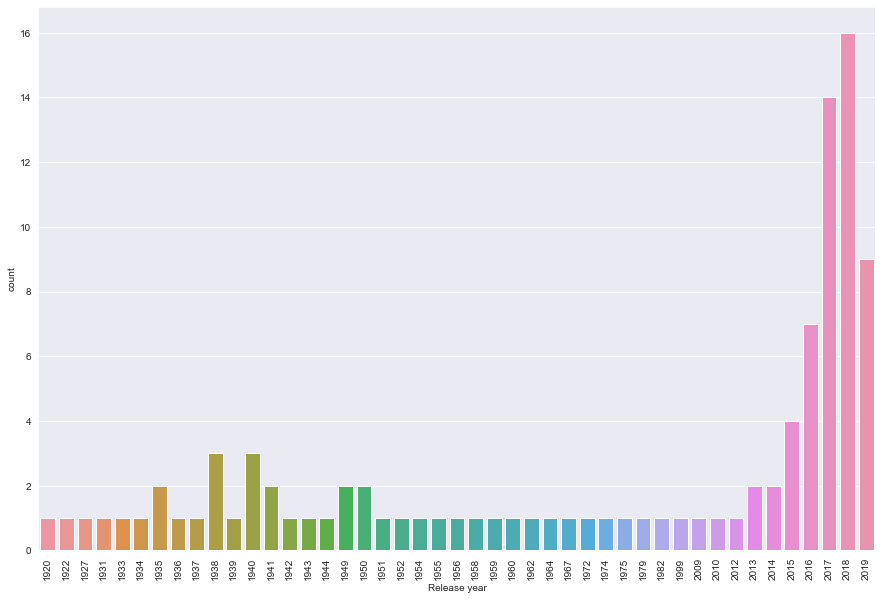

In [6]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.countplot(df['Release year'])

## Run time of the movies:

The below show plot is a distribution plot showing the distribution of the run time of the movies across the list. Most movies have a runtime between the range: 100 minutes to 140 minutes (1.5 hours to 2 hours). 
A snippet from an article **"When it comes to a movie's ideal run time, you won't know it until you check your watch"**:
    
    "The running-time rule of thumb is that comedies are 90 minutes, dramas two hours and Oscar-winners however long they please. Since 2000, the average best picture has been 131 minutes. The shortest in that time was 2011’s The Artist, at 100. The shortest ever, 1955’s Marty, a trim 90."
link: https://nationalpost.com/entertainment/movies/when-it-comes-to-a-movies-ideal-run-time-you-wont-know-it-until-you-check-your-watch

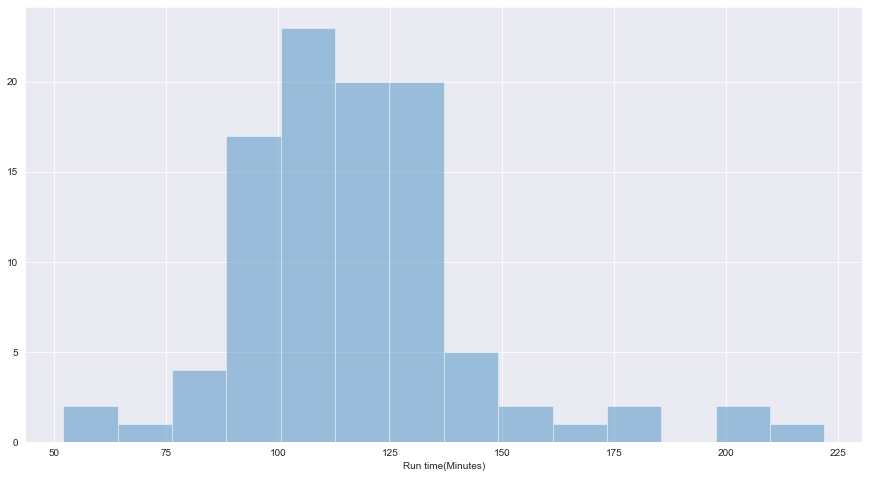

In [7]:
plt.figure(figsize=(15,8))
sns.distplot(df['Run time(Minutes)'], kde=False)

## Top 10 movies:

1. According to tomatometer ratings
2. According to Audience ratings

Parallel comparision on the basis of ratings, runtime, year distribution.

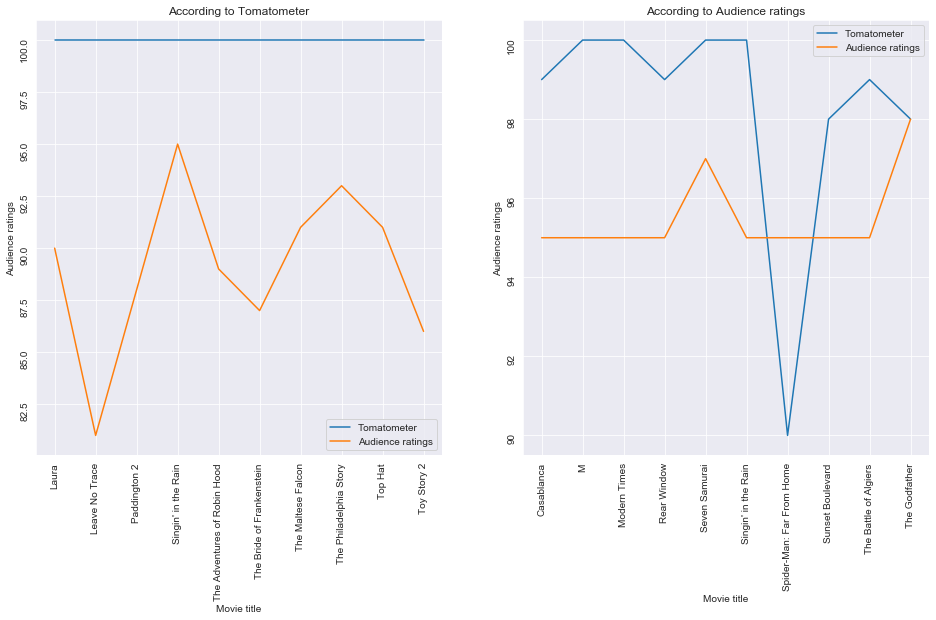

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].title.set_text('According to Tomatometer')
axs[1].title.set_text('According to Audience ratings')

axs[0].tick_params(labelrotation=90)
axs[1].tick_params(labelrotation=90)

sns.lineplot(x='Movie title', y='Tomatometer', data=df.sort_values('Tomatometer', ascending=False).head(10), label='Tomatometer', ax=axs[0])
sns.lineplot(x='Movie title', y='Audience ratings', data=df.sort_values('Tomatometer', ascending=False).head(10), label='Audience ratings', ax=axs[0])
sns.lineplot(x='Movie title', y='Tomatometer', data=df.sort_values('Audience ratings', ascending=False).head(10), label='Tomatometer', ax=axs[1])
sns.lineplot(x='Movie title', y='Audience ratings', data=df.sort_values('Audience ratings', ascending=False).head(10), label='Audience ratings', ax=axs[1])
plt.legend()

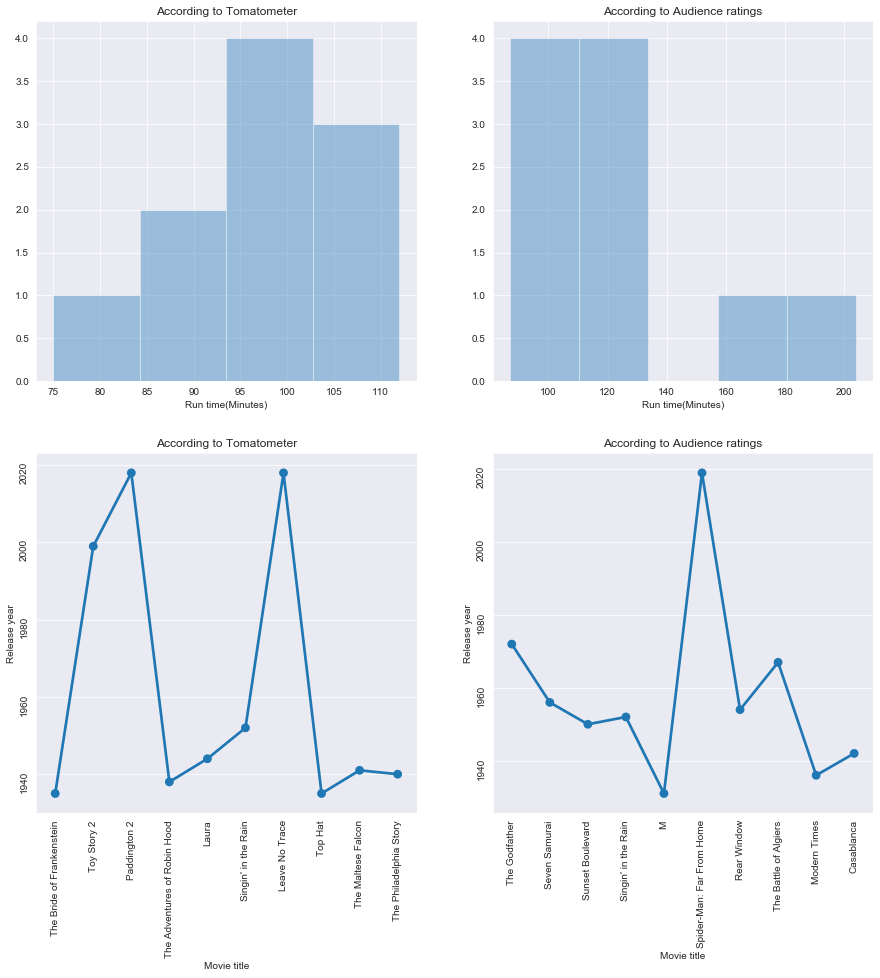

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

plt.subplots_adjust(top=1.5)

axs[0][0].title.set_text('According to Tomatometer')
axs[0][1].title.set_text('According to Audience ratings')
axs[1][0].title.set_text('According to Tomatometer')
axs[1][1].title.set_text('According to Audience ratings')

axs[1][0].tick_params(labelrotation=90)
axs[1][1].tick_params(labelrotation=90)

sns.distplot(df.sort_values('Tomatometer', ascending=False).head(10)['Run time(Minutes)'], ax=axs[0][0], kde=False)
sns.distplot(df.sort_values('Audience ratings', ascending=False).head(10)['Run time(Minutes)'], ax=axs[0][1], kde=False)
sns.pointplot(x='Movie title', y='Release year', data=df.sort_values('Tomatometer', ascending=False).head(10), ax=axs[1][0])
sns.pointplot(x='Movie title', y='Release year', data=df.sort_values('Audience ratings', ascending=False).head(10), ax=axs[1][1])

### Results:

The movies that are on the top 10 according to the tomatometer ratings are completely different from that the audience have rated. 

**According to tomatometer:**

The top 10 movies are:
1. The Bride of Frankenstein	  1935
2. Toy Story 2	                  1999
3. Modern Times	                  1936	
4. Shadow of a Doubt	          1943
5. Paddington 2	                  2018	
6. The Adventures of Robin Hood	  1938
7. Laura	                      1944
8. Leave No Trace	              2018
9. Top Hat	                      1935	
10. The Maltese Falcon	          1941	

Looking at the yearly distribution of the movies, the expected results were to see movies that recently had released, but the movies seen in the top 10 were mostly of the 1930s and with 2 movies 2018. All of these movies have got a tomatometer rating of 100%. The number of reviews these movies have got are between 40 to 60. The 2 movies of the 2018 year have obviously got a bit more higher number of reviews.

**According to audience ratings**:
1. The Godfather                1972
2. Seven Samurai	            1956	
3. Sunset Boulevard	            1950	
4. Casablanca	                1942	
5. The Battle of Algiers	    1967	
6. Spider-Man: Far From Home	2019	
7. M	                        1931	
8. Singin' in the Rain	        1952
9. Modern Times	                1936	
10. Rear Window	                1954	

A similar trend is seen in these movies too, the movies from the 20th century are being seen winning this race here too. The movies have an audience rating between 95% to 98%. 

## No of reviews Vs. Release year

Intresting, while looking for a correlation between all of these attributes, the only 2 attributes that correlated the most was the no of reviews and the release year of the movie (90.09% correlation). This does tell the amount of audience thats available for the movies from the past. But the movies with the highest number of ratings are from the past. This could be good as well as bad, because lower the no of reviews, the chance of a very high variation in the ratings of a particular movie would be lower and there are chances that the movie could be just fine and the reviews it might attain could be very positive. 

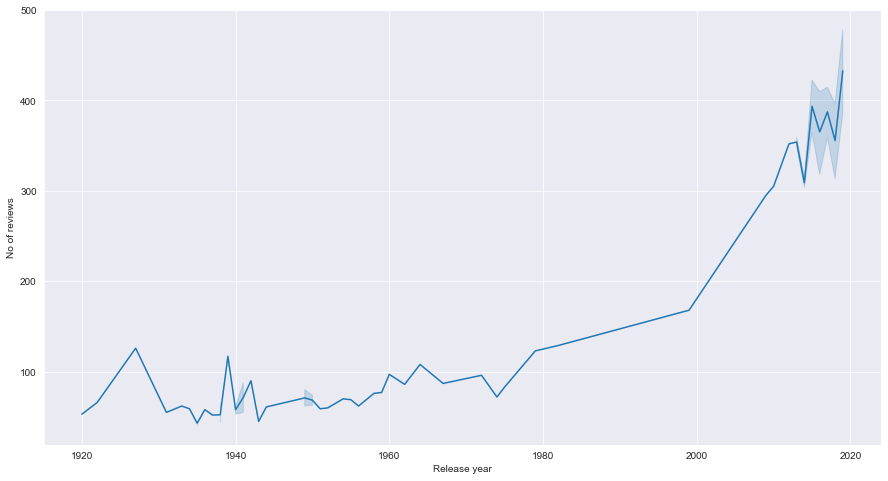

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Release year'], df['No of reviews'])

## Rating system:

<img src="Rating-system-wiki.PNG" alt="drawing"/>


The above is a snippet of how Rotten tomatoes provides its reviews (References: https://en.wikipedia.org/wiki/Rotten_Tomatoes#Critic_aggregate_score)

**Audience average scores**:
Each movie features a "user average", which calculates the percentage of registered users who have rated the film positively on a 5-star scale, similar to calculation of recognized critics' reviews.

In May 2019, Rotten Tomatoes introduced a verified rating system that would replace the earlier system where users were merely required to register in order to submit a rating. Henceforth, in addition to creating an account, users will have to verify their ticket purchase through Fandango, a ticketing company which Rotten Tomatoes is a subsidiary of. While users can still leave reviews without verifying, those reviews will not account for the average audience score displayed next to the Tomatometer.

**Critics average score:**
Rotten Tomatoes staff first collect online reviews from writers who are certified members of various writing guilds or film critic-associations. To be accepted as a critic on the website, a critic's original reviews must garner a specific number of "likes" from users. Those classified as "Top Critics" generally write for major newspapers. The critics upload their reviews to the movie page on the website, and need to mark their review "fresh" if it's generally favorable or "rotten" otherwise. It is necessary for the critic to do so as some reviews are qualitative and do not grant a numeric score, making it impossible for the system to be automatic.

## Critisism:

Rotten Tomatoes gives films a score out of 100 based on the averaged reviews of professional film critics. If a film gets a rating of 60 or more it gets a ‘fresh’ red tomato on the site. Less than 60 and it gets a rotten tomato. The best films are picked out for a ‘certified fresh’ rating, which usually means the film has at least 80 critical reviews and a rating of 75 or more. The website also separately ranks film by user scores, but let’s not get distracted by that here.

For its main rankings, Rotten Tomatoes only takes into account reviews from approved critics and approved publications. To rank as an approved critic, you have to write for a large or well-regarded website, magazine or newspaper.

But just to make things a little more complicated, Rotten Tomatoes also weights its rankings depending on how many reviews a film has. That’s why The Wizard of Oz with an average score of 99 from 111 reviews beats Citizen Kane, which an average score of 100 from 75 reviews, to the top spot. (References: https://www.wired.co.uk/article/which-film-ranking-site-should-i-trust-rotten-tomatoes-imdb-metacritic). 